<a href="https://colab.research.google.com/github/anderson-perez/Aulas-de-IEC/blob/main/Aula_27_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

* Tipos de regressão:

    Regressão simples \\
    Regressão composta \\
    Regressão polinomial \\

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
X = [random.randint(1, 10) for i in range(10)]

In [4]:
y = [random.randint(10, 20) for i in range(10)]

<Figure size 500x500 with 0 Axes>

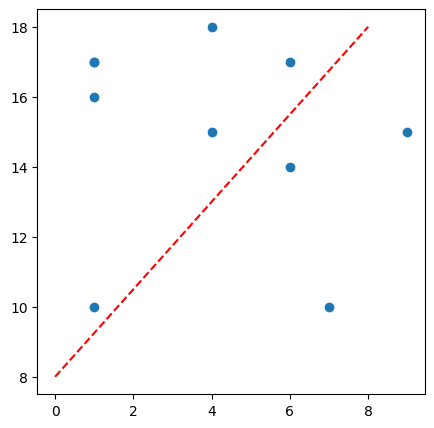

In [10]:
graf = plt.figure(figsize=(5,5))
fig, graf2 = plt.subplots(figsize=(5,5))
plt.scatter(X, y)
graf2.plot([0,8], [8, 18], '--r')
plt.show()

In [11]:
X_pol = [i for i in range(1, 10)]

In [17]:
X_pol

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
y_pol = [i * i for i in X_pol]

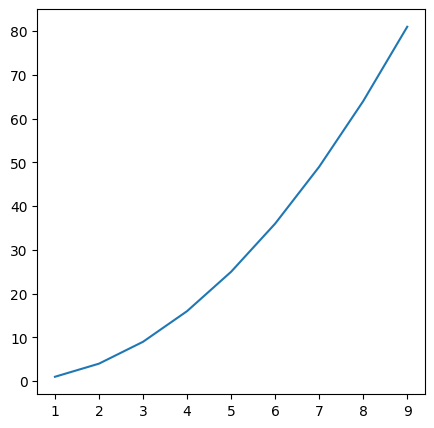

In [18]:
graf_pol = plt.figure(figsize=(5,5))
plt.plot(X_pol, y_pol)
plt.show()

In [19]:
import pandas as pd

In [20]:
dados = pd.DataFrame({'Idade': [20, 35, 33, 22, 50],
                      'Experiencia': [3, 15, 14, 10, 30],
                      'Salario': [10000, 18000, 15000, 13000, 20000]})

In [21]:
dados

,Idade,Experiencia,Salario
0,20,3,10000
1,35,15,18000
2,33,14,15000
3,22,10,13000
4,50,30,20000


# Análise Exploratória de Dados

In [22]:
dados.head(3)

,Idade,Experiencia,Salario
0,20,3,10000
1,35,15,18000
2,33,14,15000


In [23]:
dados.describe()

,Idade,Experiencia,Salario
count,5.000000,5.000000,5.000000
mean,32.000000,14.400000,15200.000000
std,12.020815,9.914636,3962.322551
min,20.000000,3.000000,10000.000000
25%,22.000000,10.000000,13000.000000
50%,33.000000,14.000000,15000.000000
75%,35.000000,15.000000,18000.000000
max,50.000000,30.000000,20000.000000


In [24]:
dados.corr()

,Idade,Experiencia,Salario
Idade,1.000000,0.971204,0.939527
Experiencia,0.971204,1.000000,0.926563
Salario,0.939527,0.926563,1.000000


In [25]:
import seaborn as sns

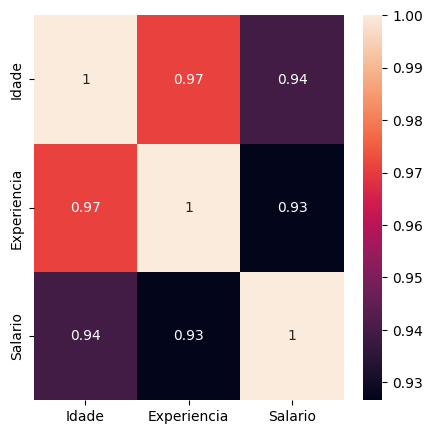

In [26]:
plt.figure(figsize = (5, 5))
sns.heatmap(dados.corr(), annot=True)
plt.show()

In [39]:
preco_casas = pd.read_csv('/content/housing.csv')

In [40]:
preco_casas.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
preco_casas.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [42]:
preco_casas.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [43]:
preco_casas['total_bedrooms'].mean()

np.float64(537.8705525375618)

In [ ]:
preco_casas['total_bedrooms'].fillna(preco_casas['total_bedrooms'].mean(), inplace=True)

In [45]:
preco_casas.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [46]:
from sklearn.preprocessing import LabelEncoder

In [48]:
preco_casas['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [49]:
lbc = LabelEncoder()

In [50]:
resultado = lbc.fit_transform(preco_casas['ocean_proximity'])

In [54]:
resultado.sort()
resultado

array([0, 0, 0, ..., 4, 4, 4])

In [55]:
preco_casas['ocean_proximity'] = lbc.fit_transform(preco_casas['ocean_proximity'])

In [56]:
preco_casas.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3


In [57]:
preco_casas.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.014688
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014688,-0.070282,-0.018186,-0.014957,0.081750,1.000000
